In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore

In [2]:
#load data set
df=pd.read_excel("E:\\flight_data.xlsx")
df.head(10)

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SpiceJet,18/02/2022,Goa,Ahmedabad,06:20,08:20,Non stop,"₹ 5,315"
2,2,Go First,18/02/2022,Goa,Ahmedabad,20:40,22:15,Non stop,"₹ 5,315"
3,3,Go First,18/02/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,"₹ 5,315"
4,4,IndiGo,18/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,"₹ 5,316"
5,5,IndiGo,18/02/2022,Goa,Ahmedabad,15:25,20:45,1 stop via Bengaluru,"₹ 5,316"
6,6,IndiGo,18/02/2022,Goa,Ahmedabad,14:35,20:45,1 stop via Bengaluru,"₹ 5,316"
7,7,IndiGo,18/02/2022,Goa,Ahmedabad,21:45,05:00,1 stop via Bengaluru,"₹ 5,316"
8,8,IndiGo,18/02/2022,Goa,Ahmedabad,18:55,05:00,1 stop via Bengaluru,"₹ 5,316"
9,9,SpiceJet,18/02/2022,Goa,Ahmedabad,21:05,23:15,Non stop,"₹ 6,365"


Since Price is my target and it seems to be continuous feature so this perticular problem is Regression Problem.

# Features Information:


1. Airline: The name of the airline.
2. Journey_date: The date of the journey
3. From: The source from which the service begins.
4. To: The destination where the service ends.
5. Route: The route taken by the flight to reach the destination.
6. D_Time: The time when the journey starts from the source.
7. A_Time: Time of arrival at the destination.
8. Stops: Total stops between the source and destination.
9. Price: The price of the ticket


In [3]:
#Checking shape of my dataset
df.shape

(6358, 9)

In my dataset i have 6358 rows and 9 columns

In [4]:
#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SpiceJet,18/02/2022,Goa,Ahmedabad,06:20,08:20,Non stop,"₹ 5,315"
2,Go First,18/02/2022,Goa,Ahmedabad,20:40,22:15,Non stop,"₹ 5,315"
3,Go First,18/02/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,"₹ 5,315"
4,IndiGo,18/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,"₹ 5,316"


Removing Unnamed: 0 column as it is the index column of csv file.

In [5]:
#Removing First row as it have only NaN values
df=df.drop([df.index[0]])

Since i am having all the entries in first row as nan so i have dropped this row.

In [6]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
1,SpiceJet,18/02/2022,Goa,Ahmedabad,06:20,08:20,Non stop,5315.0
2,Go First,18/02/2022,Goa,Ahmedabad,20:40,22:15,Non stop,5315.0
3,Go First,18/02/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,5315.0
4,IndiGo,18/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,5316.0
5,IndiGo,18/02/2022,Goa,Ahmedabad,15:25,20:45,1 stop via Bengaluru,5316.0


I have changed the price column datatype to float.

In [7]:
#Checking all column names
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

In [8]:
#Checking the data types of all columns
df.dtypes

Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

Except Price all other columns are object type datas.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.



In [9]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6357 entries, 1 to 6357
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       6357 non-null   object 
 1   Journey_date  6357 non-null   object 
 2   From          6357 non-null   object 
 3   To            6357 non-null   object 
 4   Dtime         6357 non-null   object 
 5   Atime         6357 non-null   object 
 6   Stops         6357 non-null   object 
 7   Price         6357 non-null   float64
dtypes: float64(1), object(7)
memory usage: 447.0+ KB


In [10]:
print(df['Airline'].value_counts())

IndiGo                 2318
Go First                931
Air India               822
Vistara                 805
AirAsia                 678
SpiceJet                440
SpiceJet, IndiGo         94
Air India, IndiGo        35
IndiGo, SpiceJet         34
IndiGo, AirAsia          23
Vistara, IndiGo          20
IndiGo, Air India        18
Star Air                 16
IndiGo, Go First         14
SpiceJet, AirAsia        12
IndiGo, Vistara          12
SpiceJet, Go First       12
AirAsia, IndiGo          10
Air India, AirAsia        8
SpiceJet, Air India       8
Go First, IndiGo          7
SpiceJet, Vistara         6
Vistara, AirAsia          4
AirAsia, Go First         4
Vistara, Air India        3
AirAsia, SpiceJet         3
Vistara, Go First         3
Air India, Go First       3
Star Air, Vistara         2
Go First, AirAsia         2
Vistara, SpiceJet         2
IndiGo, Star Air          1
AirAsia, Vistara          1
AirAsia, Air India        1
Air India, Vistara        1
Go First, SpiceJet  

In Airline column we have to use grouping to get better understanding on the feature.

In [11]:
#Grouping Airlines column for multiple airlines
df["Airline"].replace(("SpiceJet, IndiGo","Air India, IndiGo","IndiGo, SpiceJet","IndiGo, AirAsia","Vistara, IndiGo","IndiGo, Air India","IndiGo, Go First","SpiceJet, Go First","IndiGo, Vistara","SpiceJet, AirAsia","AirAsia, IndiGo","Air India, AirAsia","SpiceJet, Air India","Go First, IndiGo","SpiceJet, Vistara","Vistara, AirAsia","AirAsia, Go First","AirAsia, SpiceJet","Air India, Go First","Vistara, Air India","Vistara, Go First","Vistara, SpiceJet","Go First, AirAsia","Star Air, Vistara","Go First, SpiceJet","Air India, Vistara","Air India, SpiceJet","Vistara, Star Air","IndiGo, Star Air","Go First, Air India","AirAsia, Air India","AirAsia, Vistara"),"Multiple Airlines",inplace=True)


In [12]:
#Checking the value counts of Airline column
df.Airline.value_counts()

IndiGo               2318
Go First              931
Air India             822
Vistara               805
AirAsia               678
SpiceJet              440
Multiple Airlines     347
Star Air               16
Name: Airline, dtype: int64

In [13]:
print(df['Stops'].value_counts())

Non stop                         2408
1 stop via Hyderabad             1064
1 stop via Mumbai                 573
1 stop via New Delhi              447
1 stop via Bengaluru              365
                                 ... 
3 stop via Leh,Jammu,Srinagar       1
1 stop via Jharsuguda               1
2 stop via Lucknow,Hyderabad        1
2 stop via Jaipur,Mumbai            1
2 stop via Jaipur,Pune              1
Name: Stops, Length: 106, dtype: int64


In [14]:
#Grouping Stops column
df["Stops"].replace(("1 stop via Ahmedabad","1 stop via Aurangabad","1 stop via Bagdogra","1 stop via Belgaum","1 stop via Bengaluru","1 stop via Bhopal","1 stop via Chandigarh","1 stop via Chennai","1 stop via Dehradun","1 stop via Goa","1 stop via Guwahati","1 stop via Hyderabad","1 stop via Indore","1 stop via Jabalpur","1 stop via Jaipur","1 stop via Jammu","1 stop via Jharsuguda","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Kochi","1 stop via Kolkata","1 stop via Kozhikode","1 stop via Lucknow","1 stop via Mangalore","1 stop via Mumbai","1 stop via Mysore","1 stop via Nagpur","1 stop via New Delhi","1 stop via Patna","1 stop via Pune","1 stop via Raipur","1 stop via Rajkot","1 stop via Ranchi","1 stop via Shirdi","1 stop via Srinagar","1 stop via Surat","1 stop via Udaipur","1 stop via Vadodara","1 stop via Varanasi","1 stop via Vijayawada","1 stop via Visakhapatnam"),"1 Stop",inplace=True)
df["Stops"].replace(("2 stop via Aurangabad,New Delhi","2 stop via Bengaluru,Hyderabad","2 stop via Bengaluru,New Delhi","2 stop via Bengaluru,Ranchi","2 stop via Bhubaneswar,Kolkata","2 stop via Chandigarh,Srinagar","2 stop via Chennai,Guwahati","2 stop via Chennai,Hyderabad","2 stop via Goa,Hyderabad","2 stop via Guwahati,Chennai","2 stop via Hyderabad,Aurangabad","2 stop via Hyderabad,Bengaluru","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Goa","2 stop via Hyderabad,Lucknow","2 stop via Hyderabad,Mumbai","2 stop via Hyderabad,Mysore","2 stop via Hyderabad,New Delhi","2 stop via Hyderabad,Raipur","2 stop via Hyderabad,Vijayawada","2 stop via Hyderabad,Visakhapatnam","2 stop via Jaipur,Mumbai","2 stop via Jaipur,Pune","2 stop via Jammu,Srinagar","2 stop via Kolhapur,Hyderabad","2 stop via Lucknow,Hyderabad","2 stop via Lucknow,New Delhi","2 stop via Mangalore,Mumbai","2 stop via Mumbai,Dehradun","2 stop via Mumbai,Goa","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,Kochi","2 stop via Mumbai,New Delhi","2 stop via Mumbai,Ranchi","2 stop via Mysore,Hyderabad","2 stop via Nasik,Pune","2 stop via New Delhi,Bengaluru","2 stop via New Delhi,Bhopal","2 stop via New Delhi,Hyderabad","2 stop via New Delhi,Mumbai","2 stop via New Delhi,Surat","2 stop via Vijayawada,Hyderabad","2 stop via Visakhapatnam,Hyderabad"),"2 Stops",inplace=True)
df["Stops"].replace(("3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Bengaluru,New Delhi,Hyderabad","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Chennai,New Delhi,Hyderabad","3 stop via Guwahati,Imphal,Kolkata","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Hyderabad,New Delhi,Kolkata","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,New Delhi,Bengaluru","3 stop via Kolkata,Aizawl,Guwahati","3 stop via Leh,Jammu,Srinagar","3 stop via Mangalore,Mumbai,New Delhi","3 stop via Mumbai,New Delhi,Hyderabad","3 stop via Nasik,Pune,Bhopal","3 stop via New Delhi,Hyderabad,Mysore"),"3 Stops",inplace=True)
df["Stops"].replace(("4 stop via Hyderabad,New Delhi,Surat,Bhubaneswar","4 stop via Mysore,Kochi,New Delhi,Hyderabad","4 stop via Nasik,Pune,Bhopal,New Delhi","4 stop via Nasik,Pune,New Delhi,Hyderabad","4 stop via Patna,Kolkata,New Delhi,Hyderabad"),"4 Stops",inplace=True)
df["Stops"].replace(("5 stop via Hyderabad,New Delhi,Nagpur,Raipur,Visakhapatnam"),"5 Stops",inplace=True)

In [15]:
df.Stops.value_counts()


1 Stop      3481
Non stop    2408
2 Stops      393
3 Stops       65
4 Stops        9
5 Stops        1
Name: Stops, dtype: int64

In [16]:
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4,"5 Stops": 5},inplace = True)


In [17]:
df.Stops.value_counts()

1    3481
0    2408
2     393
3      65
4       9
5       1
Name: Stops, dtype: int64

Now Stops column is set for our analysis.

In [18]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


I don't find any nan values in the dataset.

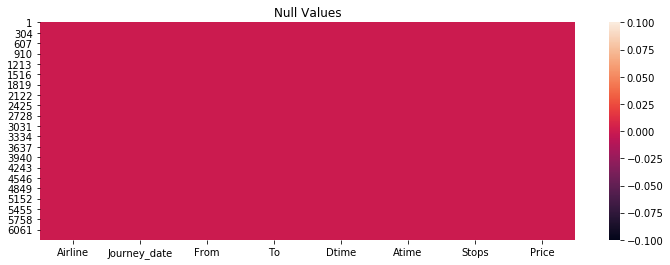

In [19]:
#Visualizeing null values
plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [20]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

In [21]:
#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [22]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2022    6357
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [23]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)

In [24]:
#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

2    6357
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [25]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)

In [26]:
#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

23    961
24    956
22    924
21    915
20    903
19    867
18    831
Name: Journey_day, dtype: int64

Now Journey_day is ready for our analysis.

In [27]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

Dropping Journey_date column after extracting requered information.

In [28]:
#Converting object data type to datetime 
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])

In [29]:
#Checking the data types of all columns again
df.dtypes

Airline                object
From                   object
To                     object
Dtime          datetime64[ns]
Atime          datetime64[ns]
Stops                   int64
Price                 float64
Journey_day             int64
dtype: object

The data type has changed now.

In [30]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute

In [31]:
#Droping Dep_Time column after extraction
df = df.drop(["Dtime"],axis=1)

In [32]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute

In [33]:
#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [34]:
#Checking the data types of all columns again
df.dtypes

Airline         object
From            object
To              object
Stops            int64
Price          float64
Journey_day      int64
Dhour            int64
DMin             int64
AHour            int64
AMin             int64
dtype: object

This is the datatypes after extraction and preprocessing.

In [35]:
#Checking description of data set
df.describe()

,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000
mean,0.708353,8901.964763,21.091867,13.018720,25.857323,14.326097,27.907818
std,0.641702,3971.006211,1.989919,5.727952,17.753502,6.559322,17.119844
min,0.000000,3328.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5949.000000,19.000000,8.000000,10.000000,9.000000,15.000000
50%,1.000000,7530.000000,21.000000,14.000000,25.000000,15.000000,30.000000
75%,1.000000,10772.000000,23.000000,18.000000,40.000000,20.000000,40.000000
max,5.000000,32722.000000,24.000000,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.


In [36]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To']


In [37]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Stops', 'Price', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


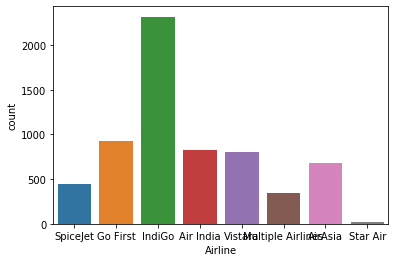

In [38]:
sns.countplot(df['Airline'])

above countplot shows values for airline

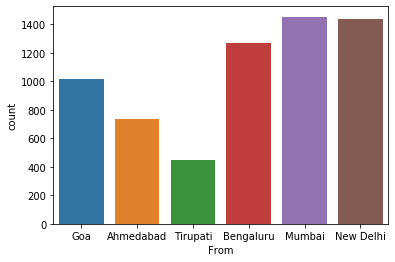

In [39]:
sns.countplot(df['From'])

Mumbai has maximum count for source which means maximum passengers are choosing Mumbai as there source.

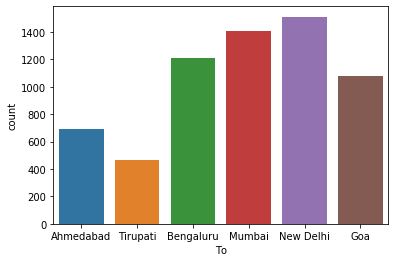

In [40]:
sns.countplot(df['To'])

New Delhi has maximum count for Destination which means maximum passengers are choosing New Delhi as there Destination.

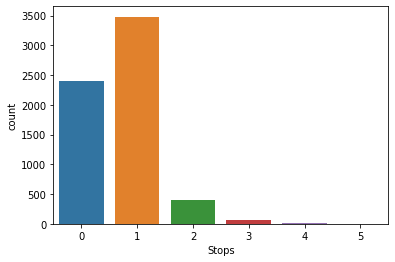

In [41]:
sns.countplot(df['Stops'])

Most of the flights have 1 stops.

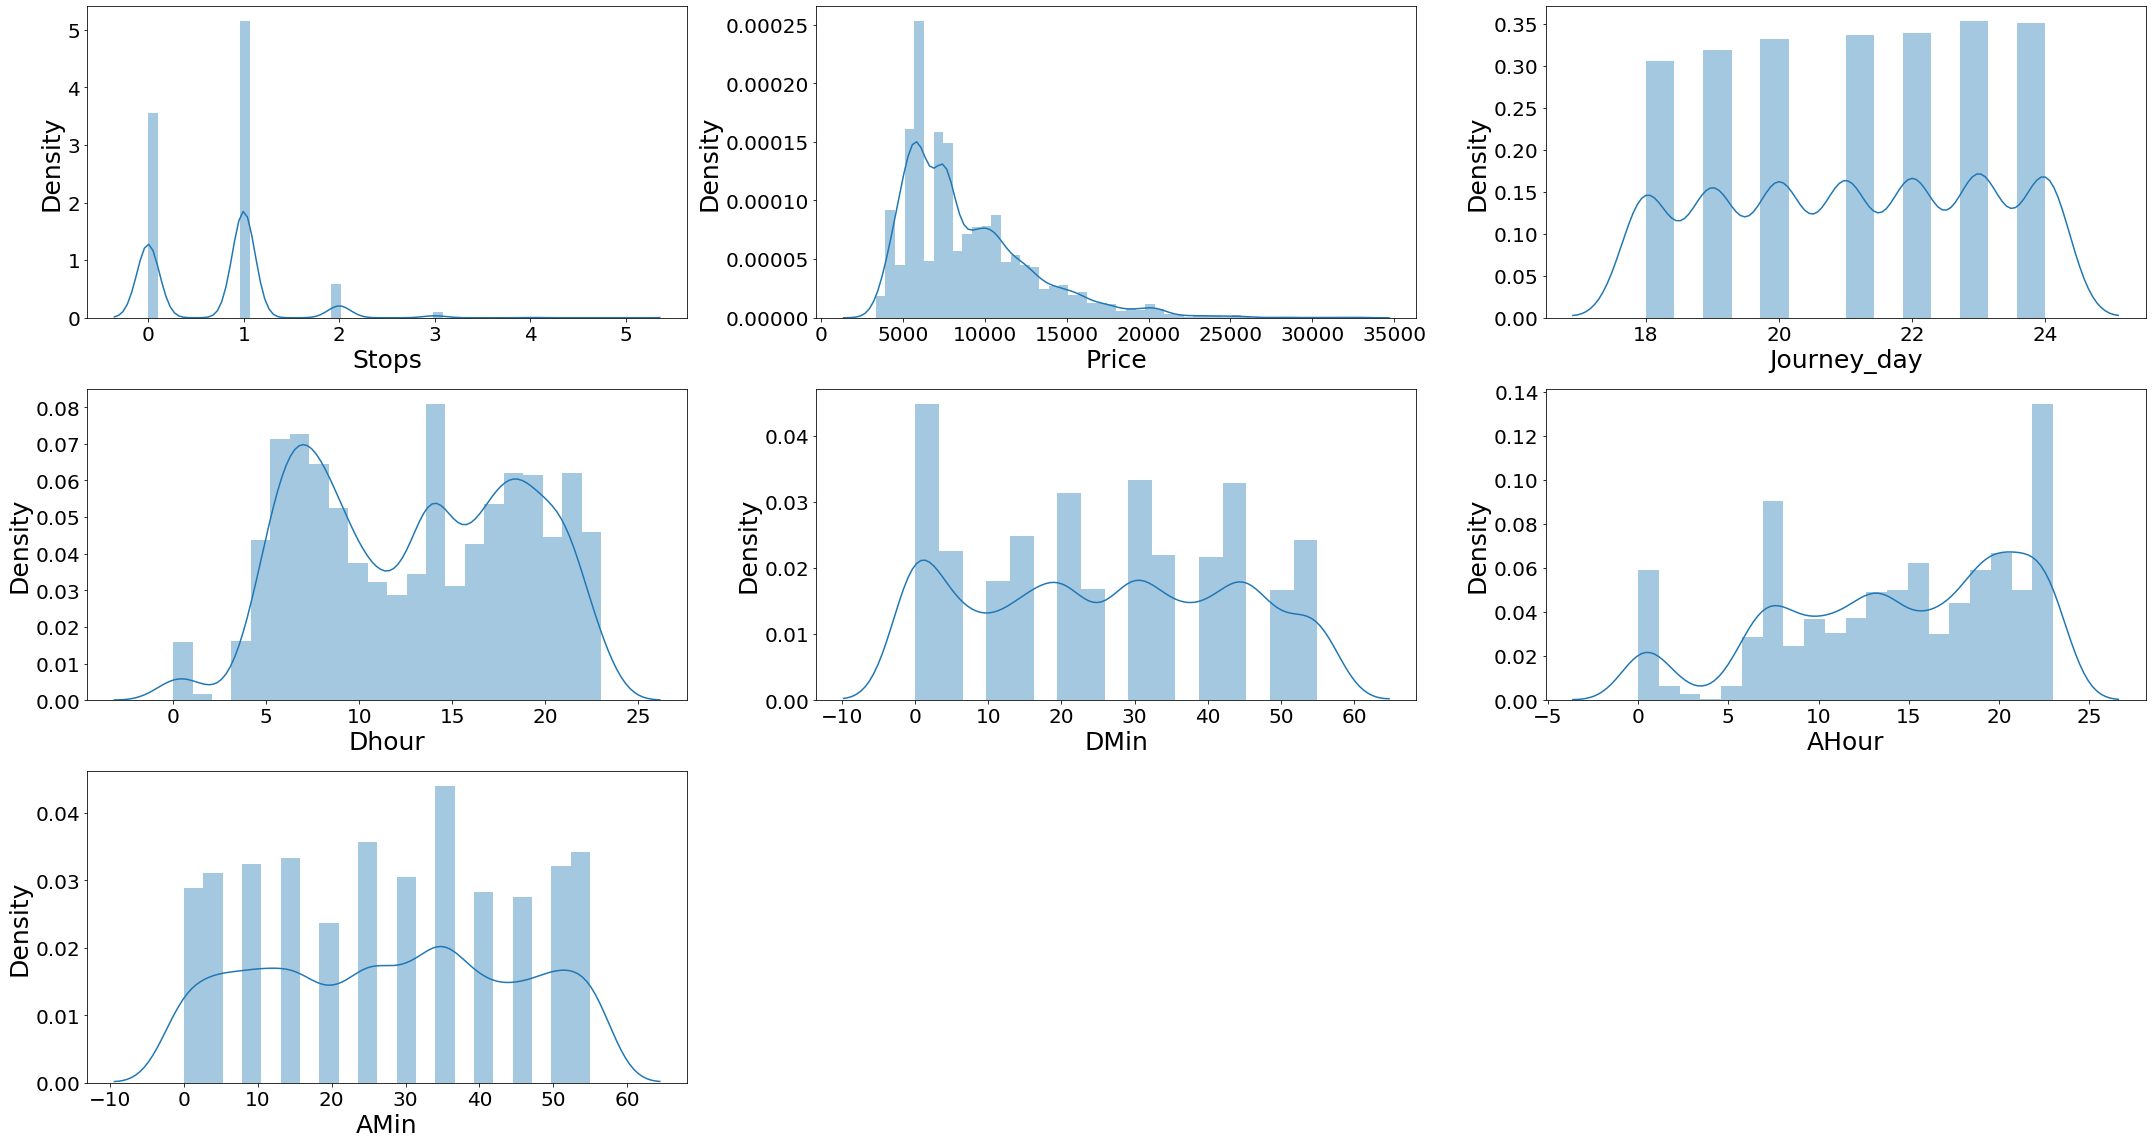

In [42]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in any of the numerical columns.

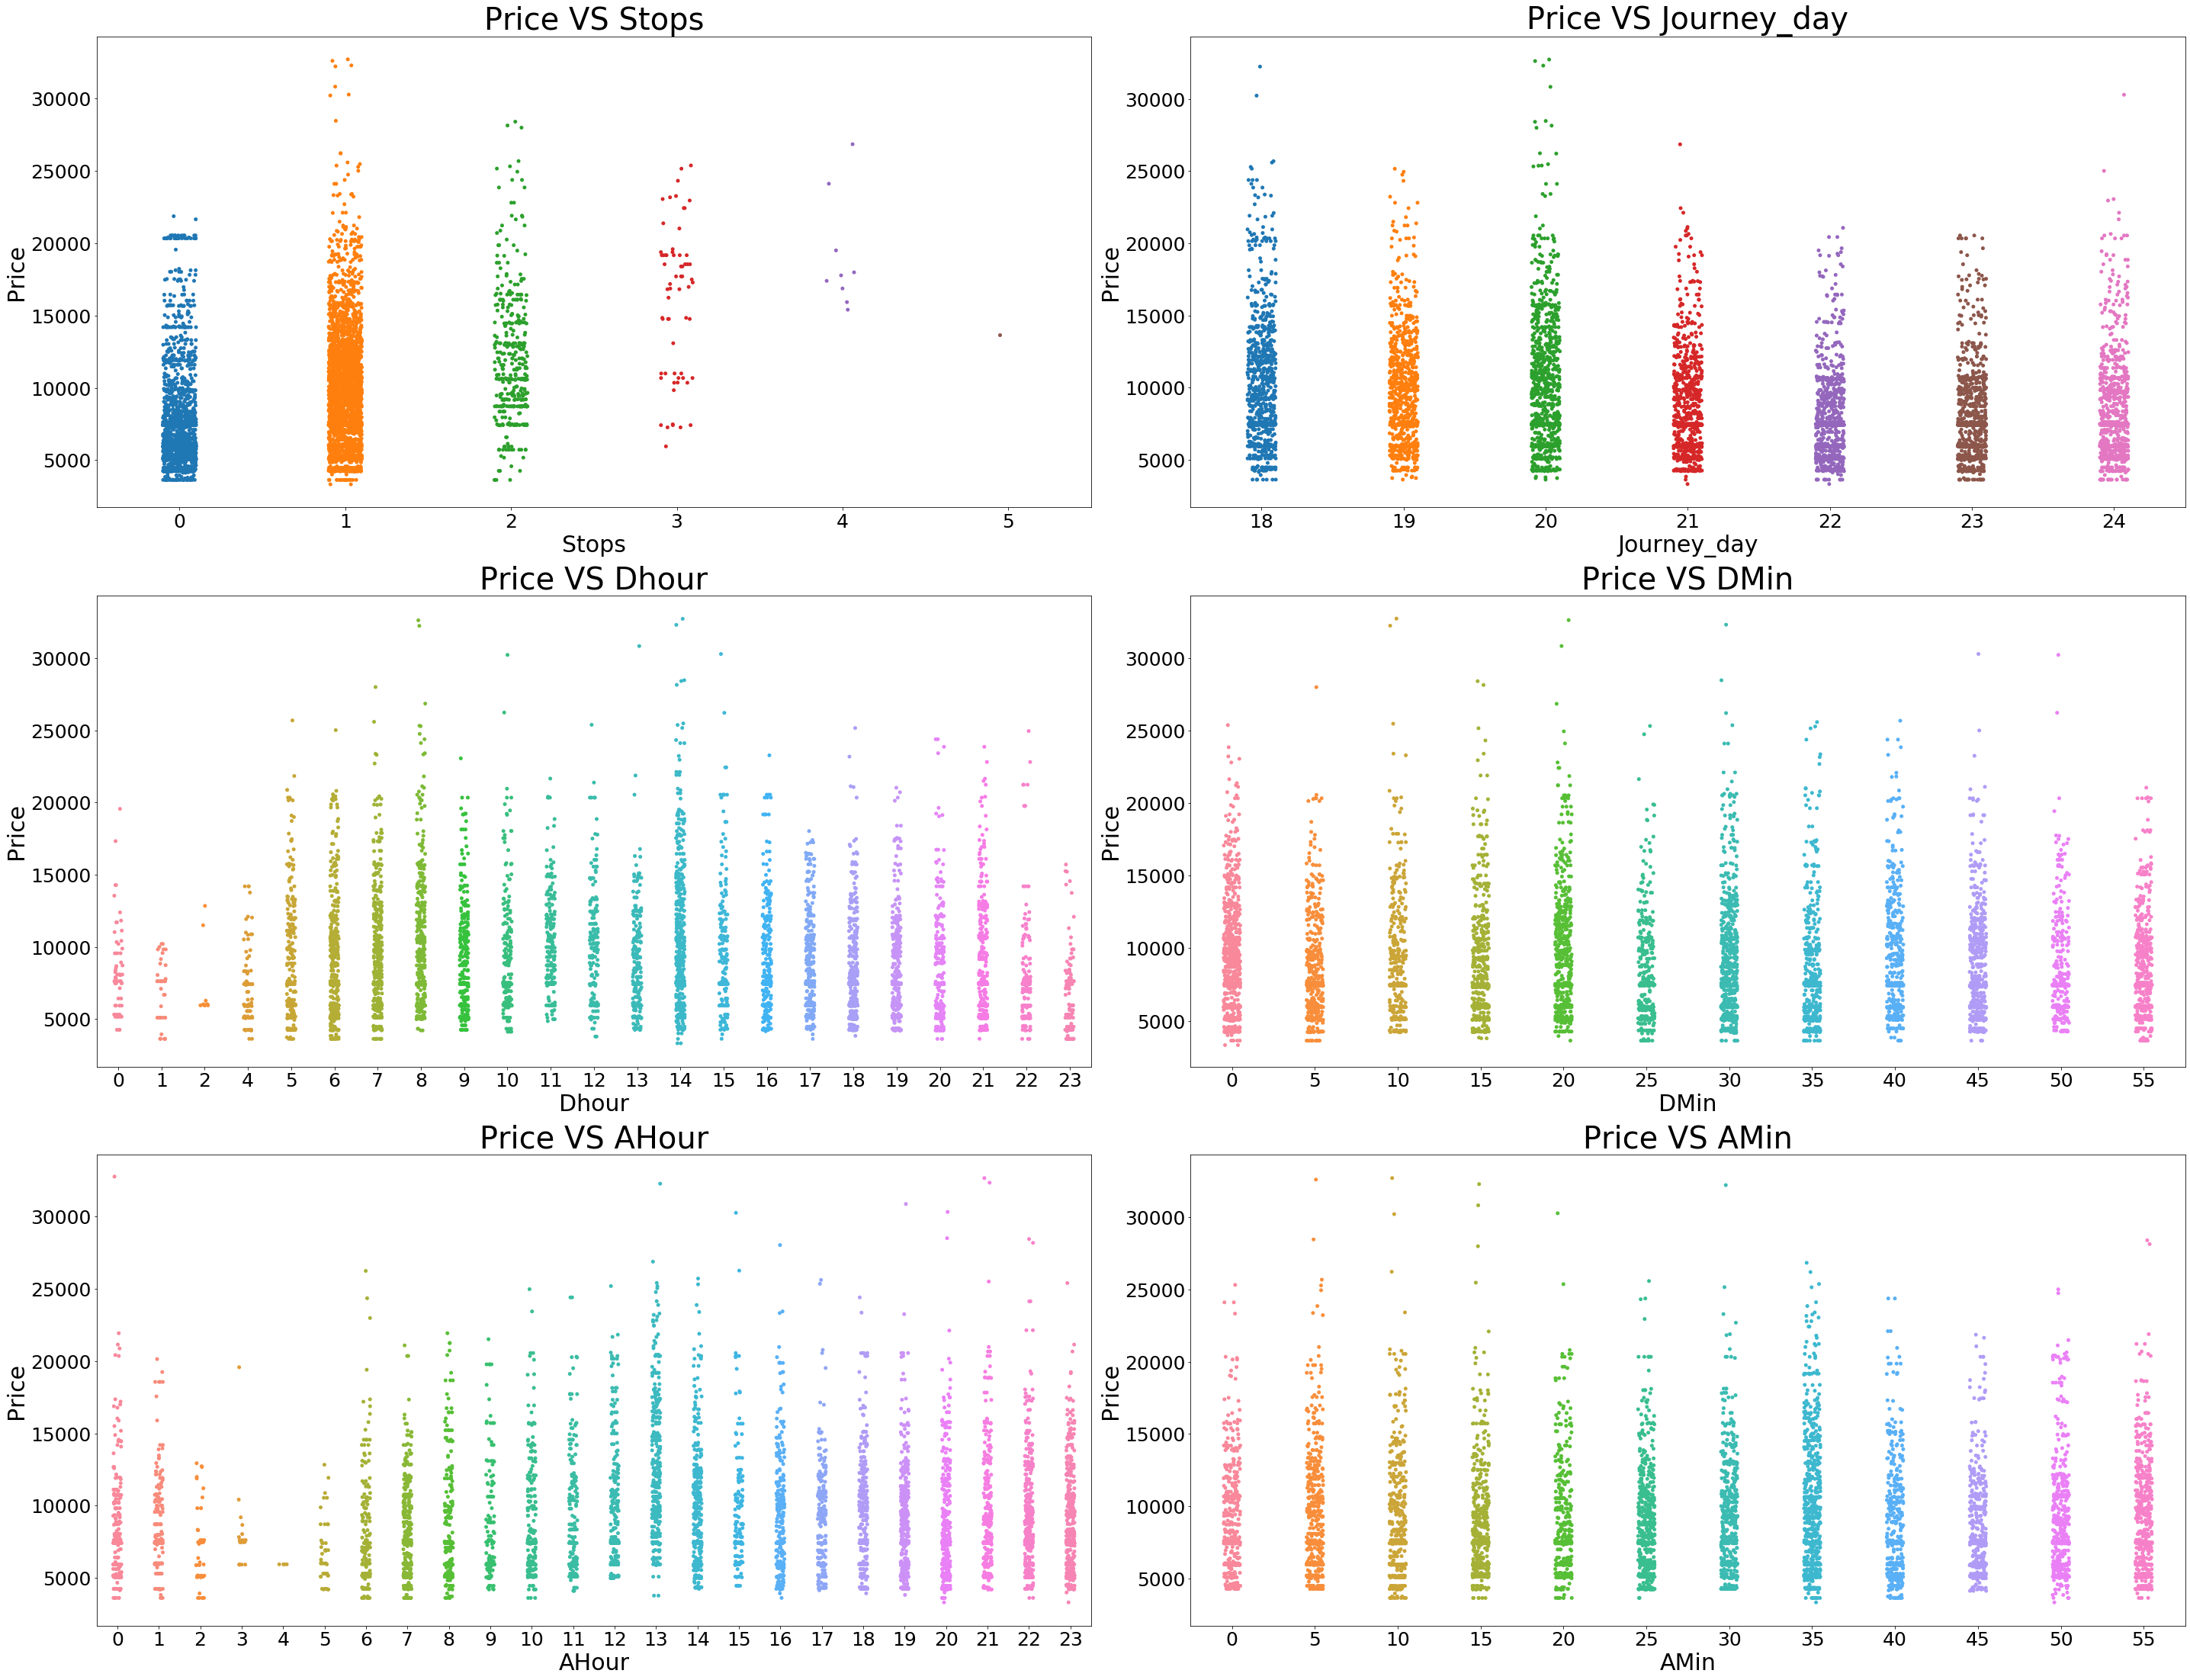

In [43]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

Observations:

1. Flights with 1 stops costs more price compared to other flights.
2. In all the dates the price is almost same.
3. At 2PM departure time of every day the flight Prices are high so it looks good to book flights rather than this departure time.
4. And Departure minute has less relation with target Price.
5. At 7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights rather than this arrival time.
6. And Arrival minute has less relation with target Price.


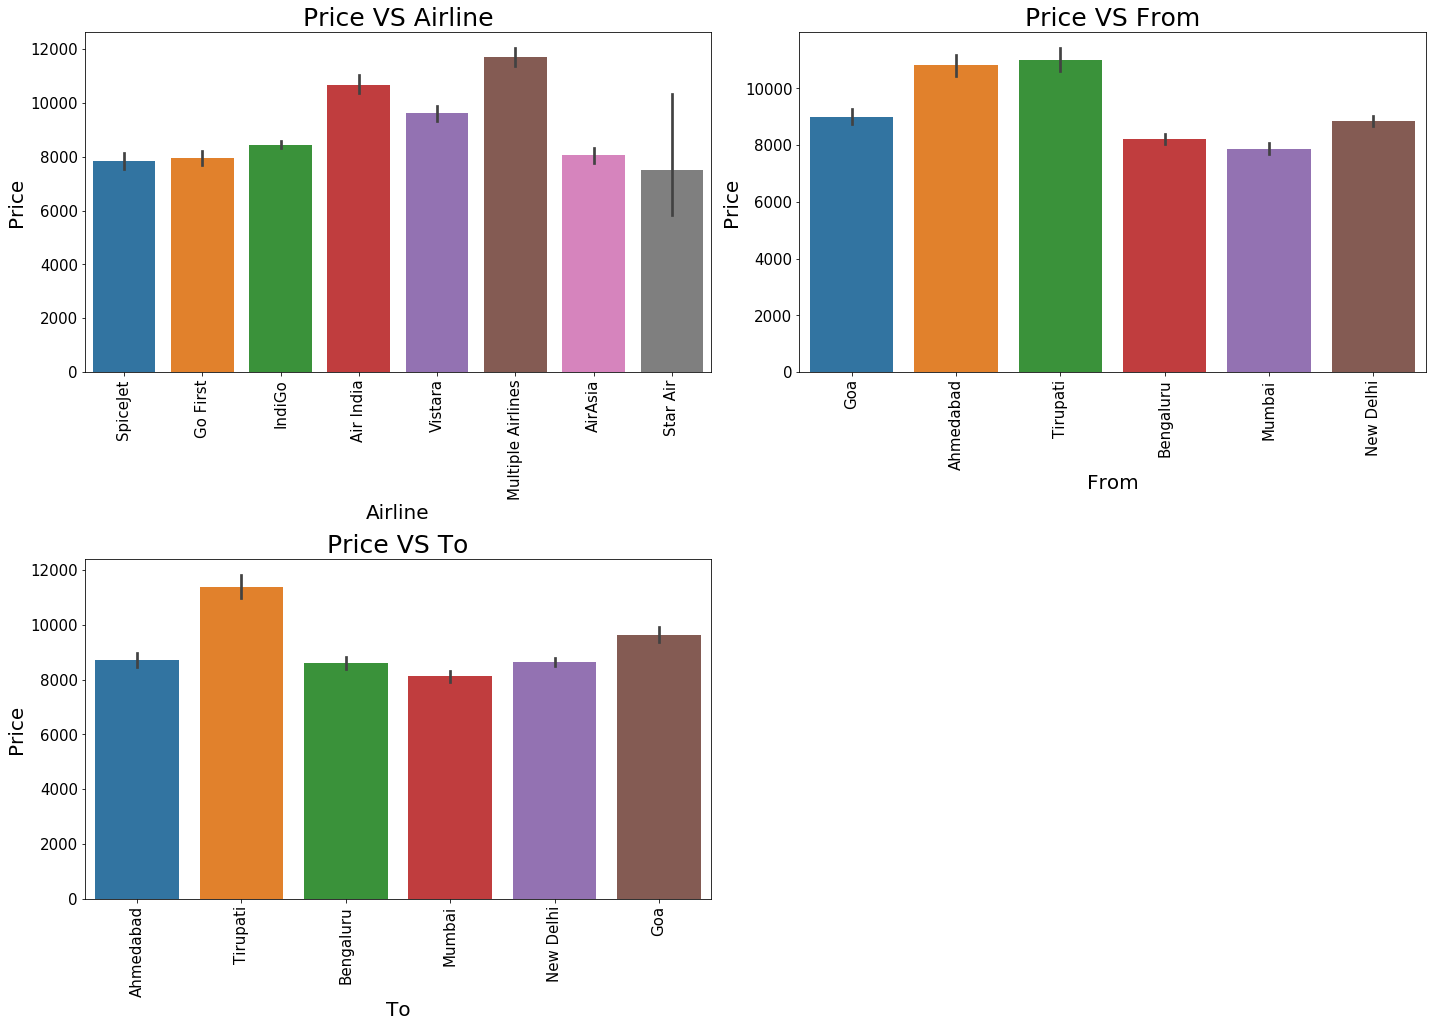

In [44]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(categorical_columns[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

Observations:

1. For Multiple Airlines the Price is high compared to other Airlines.
2. Taking Tirupati as Source costs highest Price Compared to other Source points.
3. Taking Tirupati as Destination costs highest Price Compared to other Destination points.


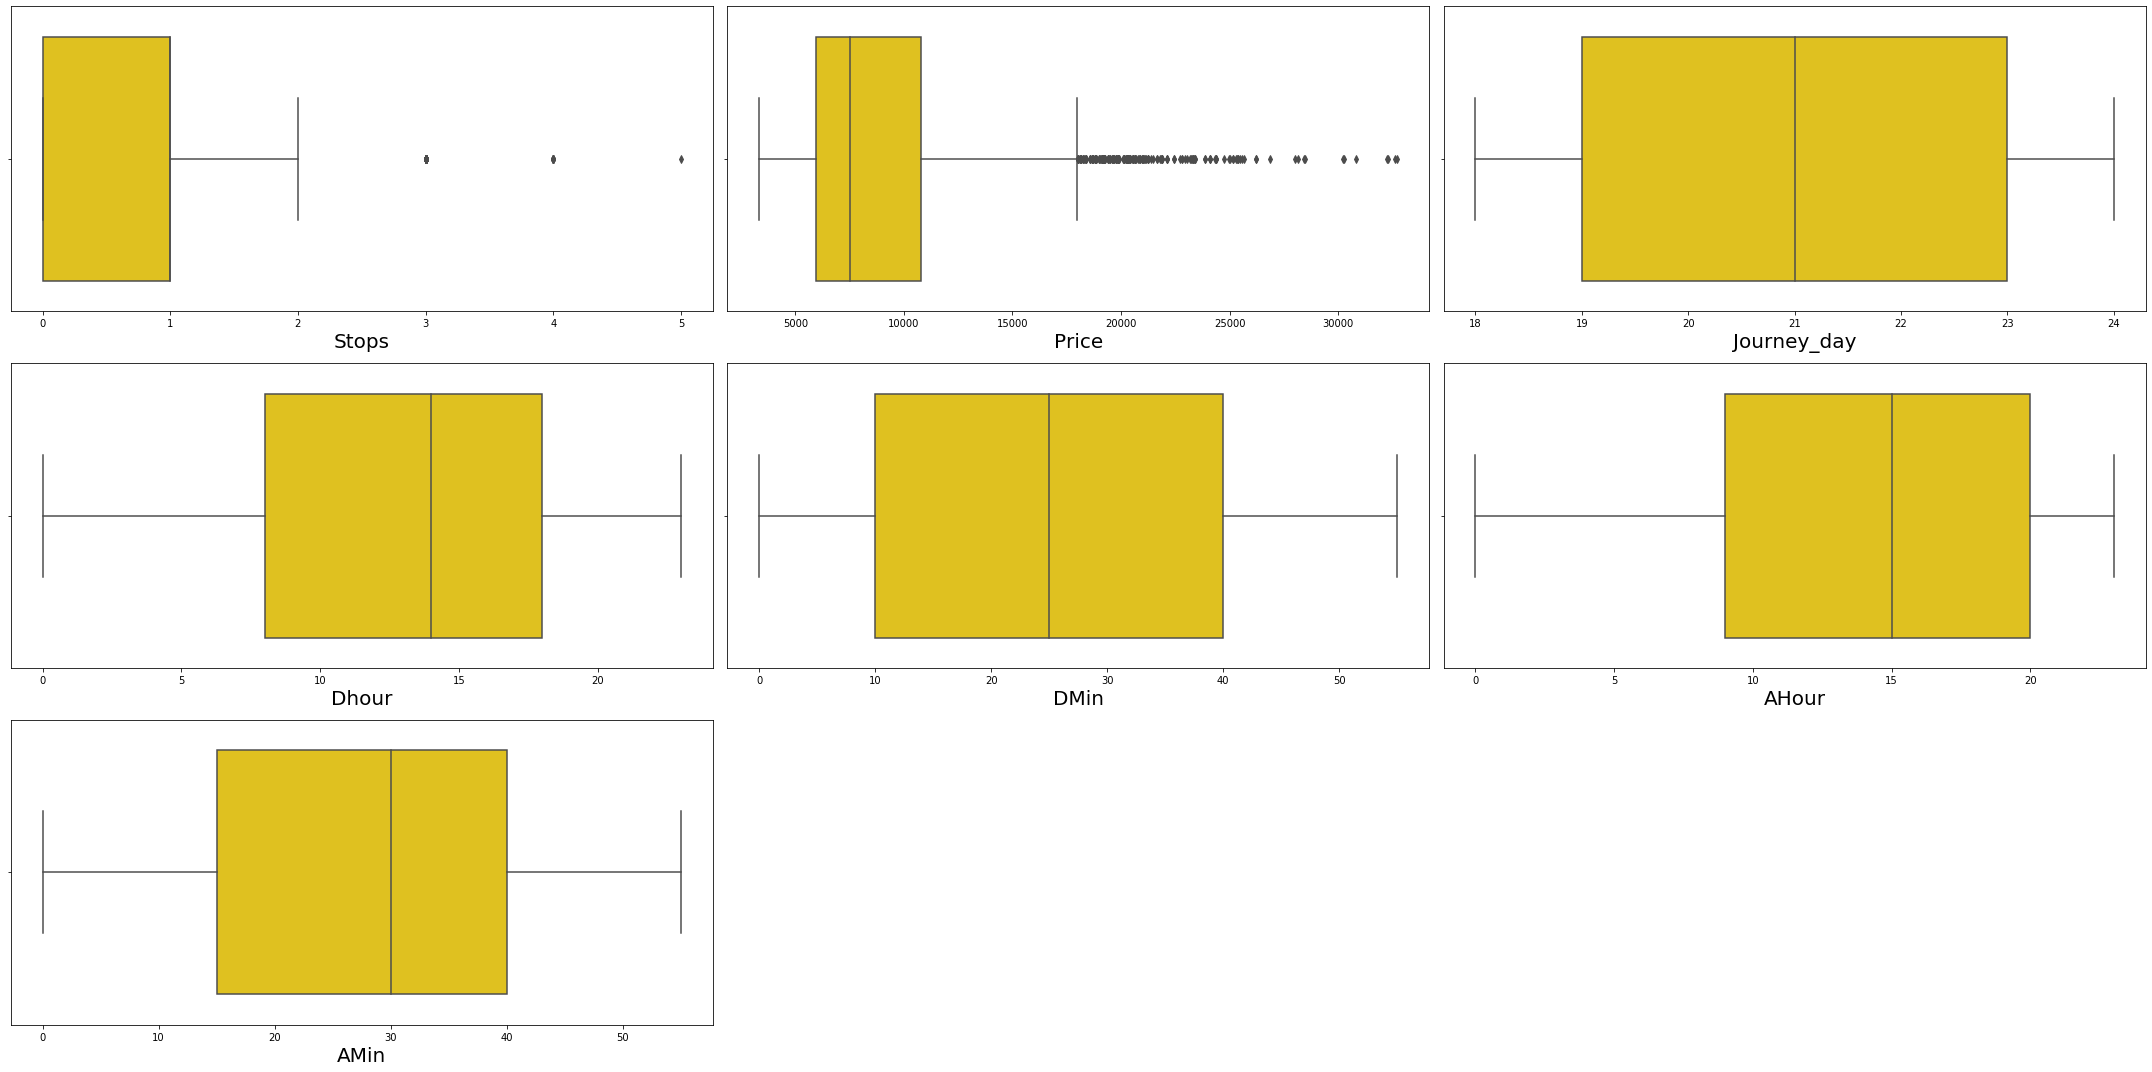

In [45]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in
    
    1. Stops
    2. Price

Since Price is my target i should not remove outliers from this column.And Stops is a categorical column So i should not remove outliers here also.

In [46]:
#Checking for skewness
df.skew()

Stops          0.750254
Price          1.431018
Journey_day   -0.055792
Dhour         -0.063949
DMin           0.031690
AHour         -0.510077
AMin          -0.023661
dtype: float64

There is skewness in Stops and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated. And Stops is categorical column so i should not remove skewness here also.

In [47]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To']


In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [49]:
df.head()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
1,5,2,0,0,5315.0,18,6,20,8,20
2,2,2,0,0,5315.0,18,20,40,22,15
3,2,2,0,1,5315.0,18,14,0,20,55
4,3,2,0,0,5316.0,18,23,25,1,0
5,3,2,0,1,5316.0,18,15,25,20,45


Using label encoder i have encoded the categorical columns.

In [50]:
cor=df.corr()
cor

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Airline,1.000000,0.048155,-0.010009,-0.221667,-0.001078,-0.061586,-0.069889,0.212360,0.037338,-0.025366
From,0.048155,1.000000,-0.164765,0.033927,-0.020710,-0.001684,-0.032772,-0.055420,0.112607,-0.029624
To,-0.010009,-0.164765,1.000000,0.001292,0.057727,0.014574,-0.062643,-0.014762,-0.055827,0.034742
Stops,-0.221667,0.033927,0.001292,1.000000,0.388547,-0.002178,-0.055444,-0.054834,0.011759,-0.007002
Price,-0.001078,-0.020710,0.057727,0.388547,1.000000,-0.253022,-0.056063,-0.019235,0.033044,0.003182
Journey_day,-0.061586,-0.001684,0.014574,-0.002178,-0.253022,1.000000,0.008490,-0.005882,-0.019484,-0.004171
Dhour,-0.069889,-0.032772,-0.062643,-0.055444,-0.056063,0.008490,1.000000,0.034583,0.112315,0.019476
DMin,0.212360,-0.055420,-0.014762,-0.054834,-0.019235,-0.005882,0.034583,1.000000,-0.031550,-0.032132
AHour,0.037338,0.112607,-0.055827,0.011759,0.033044,-0.019484,0.112315,-0.031550,1.000000,-0.040369
AMin,-0.025366,-0.029624,0.034742,-0.007002,0.003182,-0.004171,0.019476,-0.032132,-0.040369,1.000000


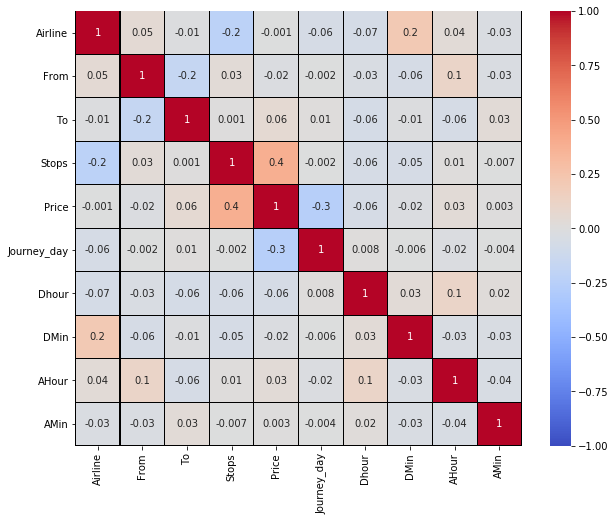

In [51]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

    1.There is no multicolinearity issue in any features.
    2.AMin is very less correlated with target.

There is no multicolinearity issue in this dataset.

In [52]:
x1=df.drop('Price',axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [53]:
y1=df['Price']

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=scaled
y=y1

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [56]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 2049.296854146806
Mean squared error 9155849.384442326
Root Mean squared error 3025.8634113988564
R2 Score 0.4073247128942179
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 2850.6045912825916
Mean squared error 17111882.61917947
Root Mean squared error 4136.651135783566
R2 Score -0.1076842265967839
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 1625.001906577693
Mean squared error 8791395.857006673
Root Mean squared error 2965.028812171422
R2 Score 0.4309164726469147
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 2558.5505583255185
Mean squared error 12563200.96281796
Root Mean squared error 3544.4606025202143
R2 Score 0.18676046044860783
-------------------------

In [57]:
scorel=[]
x=scaled
y=y1

In [58]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([ 0.16625659,  0.01502503, -0.37906022,  0.05029501, -0.11377522])

In [59]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-0.2043957 , -0.27479812, -0.04674049,  0.01704205, -0.07451667])

In [60]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([ 0.16789137,  0.22043789,  0.17034048,  0.20214962, -0.09026612])

In [61]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([ 0.16750889,  0.22003671,  0.17055607,  0.20198998, -0.08639567])

In [62]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([ 0.3120299 ,  0.31547779,  0.06316703, -0.072975  , -0.61697935])

In [63]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.33352581, 0.36056268, 0.35266456, 0.15983703, 0.05989562])

RandomForestRegressor has least difference

In [64]:
#HYPERPARAMETER TO GET BEST PARAMETER
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_features': ['auto', 'sqrt','log2'],
    'n_estimators': [10, 100, 200, 500],
    'bootstrap':[True],'criterion':['mse','mae']
}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 500}


In [66]:
x=scaled
y=y1

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model1=RandomForestRegressor(n_estimators=100,max_features='sqrt',bootstrap=True,criterion='mse')
model1.fit(xtrain,ytrain)
p=model1.predict(xtest)
acc=model1.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',round(r2,2))

Accuracy 66.0
Mean absolute error 1462.846820230608
Mean squared error 5186135.788991698
Root Mean squared error 2277.308891870336
r2 score 0.66


This is my model after tuning I got 66.0% as r2_score before it was 63.5% which means accuracy has increased which is gooddd!!!.

In [68]:
# Saving the model using .pkl
from joblib import dump
dump(model1, 'flight.joblib')

['flight.joblib']

I have saved my model as Flight_Price using .pkl